In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import tplquad

In [2]:
# physical parameters

# Bohr radius
a0 = 0.529 # Å

# Vaccume permitivity
e_0 = 8.854e-42 # kg^-1 * Å^-3 * s^4 * A^2

# Elementary charge
e = 1.60217663e-19 # A * s 

# Carbon's mass ratio
Z = 12.01

# Lattice Spacing
d = 1.42 # Å

# Lattice constant of the Bravais
a = np.sqrt(3)*d #[Å]

# 1eV = 1.6*10^(-19) [J]
# 1[J] = 1/1.6*10^(19)
# 1[J] = kg * m^2 * s^(-2) = 10^20 * kg * s^(-2) * Å^2

# So 1 eV = 16 [kg * s^(-2) * Å^2]
# 1[kg * s^(-2) * Å^2] = 0.16[eV]

In [3]:
# Define the dot product

def k1a1(x,y):
    dot = a*(1/2*x + np.sqrt(3)/2*y)
    return dot

def k2a2(x,y):
    dot = a*(-1/2*x + np.sqrt(3)/2*y)
    return dot

# Define the matrix

def matrix(x,y,eps0s,eps0p,sssigma,spsigma,ppsigma,pppi):
    
    I = np.zeros((8,8))
    I[0][0] = - eps0s
    I[0][1] = -sssigma*(1 + np.exp(1j*(k1a1(x,y))) + np.exp(1j*(k2a2(x,y))))
    I[0][2] = 0
    I[0][3] = 0
    I[0][4] = 0
    I[0][5] = -np.sqrt(3)/2*spsigma*(np.exp(1j*(k1a1(x,y))) + np.exp(1j*(k2a2(x,y))))
    I[0][6] = 0
    I[0][7] = spsigma - 1/2*spsigma*(np.exp(1j*(k1a1(x,y))) + np.exp(1j*(k2a2(x,y))))

    I[1][0] = -sssigma*(1 + np.exp(-1j*(k1a1(x,y))) + np.exp(-1j*(k2a2(x,y))))
    I[1][1] = - eps0s
    I[1][2] = 0
    I[1][3] = 0
    I[1][4] = np.sqrt(3)/2*spsigma*(np.exp(-1j*(k1a1(x,y))) + np.exp(-1j*(k2a2(x,y))))
    I[1][5] = 0
    I[1][6] = -spsigma + 1/2*spsigma*(np.exp(-1j*(k1a1(x,y))) + np.exp(-1j*(k2a2(x,y))))
    I[1][7] = 0

    I[2][0] = 0
    I[2][1] = 0
    I[2][2] = - eps0p
    I[2][3] = -pppi*(1 + np.exp(1j*(k1a1(x,y))) + np.exp(1j*(k2a2(x,y))))
    I[2][4] = 0
    I[2][5] = 0
    I[2][6] = 0
    I[2][7] = 0

    I[3][0] = 0
    I[3][1] = 0
    I[3][2] = 0
    I[3][3] = -pppi*(1 + np.exp(-1j*(k1a1(x,y))) + np.exp(-1j*(k2a2(x,y))))
    I[3][4] = - eps0p
    I[3][5] = 0
    I[3][6] = 0
    I[3][7] = 0
    
    I[4][0] = 0
    I[4][1] = np.sqrt(3)/2*spsigma*(np.exp(1j*(k1a1(x,y))) + np.exp(1j*(k2a2(x,y))))
    I[4][2] = 0
    I[4][3] = 0
    I[4][4] = - eps0p
    I[4][5] = -pppi - 1/4*(3*ppsigma + 1*pppi)*(np.exp(1j*(k1a1(x,y))) + np.exp(1j*(k2a2(x,y))))
    I[4][6] = 0
    I[4][7] = -np.sqrt(3)/4*(ppsigma-pppi)*(np.exp(1j*(k1a1(x,y))) - np.exp(1j*(k2a2(x,y))))
    
    I[5][0] = -np.sqrt(3)/2*spsigma*(np.exp(-1j*(k1a1(x,y))) + np.exp(-1j*(k2a2(x,y))))
    I[5][1] = 0
    I[5][2] = 0
    I[5][3] = 0
    I[5][4] = -pppi - 1/4*(3*ppsigma + 1*pppi)*(np.exp(-1j*(k1a1(x,y))) + np.exp(-1j*(k2a2(x,y))))
    I[5][5] = - eps0p
    I[5][6] = -np.sqrt(3)/4*(ppsigma-pppi)*(np.exp(-1j*(k1a1(x,y))) + np.exp(-1j*(k2a2(x,y))))
    I[5][7] = 0
    
    I[6][0] = 0
    I[6][1] = -spsigma + 1/2*spsigma*(np.exp(1j*(k1a1(x,y))) + np.exp(1j*(k2a2(x,y))))
    I[6][2] = 0
    I[6][3] = 0
    I[6][4] = 0
    I[6][5] = -np.sqrt(3)/4*(ppsigma-pppi)*(np.exp(1j*(k1a1(x,y))) + np.exp(1j*(k2a2(x,y))))
    I[6][6] = - eps0p
    I[6][7] = -ppsigma -1/4*(ppsigma+pppi)*(np.exp(1j*(k1a1(x,y))) + np.exp(1j*(k2a2(x,y))))
    
    I[7][0] = spsigma - 1/2*spsigma*(np.exp(-1j*(k1a1(x,y))) + np.exp(-1j*(k2a2(x,y))))
    I[7][1] = 0
    I[7][2] = 0
    I[7][3] = 0
    I[7][4] = -np.sqrt(3)/4*(ppsigma-pppi)*(np.exp(-1j*(k1a1(x,y))) - np.exp(-1j*(k2a2(x,y))))
    I[7][5] = 0
    I[7][6] = -ppsigma -1/4*(ppsigma+pppi)*(np.exp(-1j*(k1a1(x,y))) + np.exp(-1j*(k2a2(x,y))))
    I[7][7] = - eps0p
    
    return I

In [4]:
# s-orbital
def s_orbit(x, y, z, a0 = a0, Z = Z):
    r = np.sqrt(x**2 + y**2 + z**2 + 1e-20)
    psi = 1/np.sqrt(np.pi) * (Z/(2*a0))**(3/2) * (1 - Z*r/(2*a0)) * np.exp(-Z*r/(2*a0))
    return psi

# pz-orbital
def pz_orbit(x, y, z, a0 = a0, Z = Z):
    r = np.sqrt(x**2 + y**2 + z**2 + 1e-20)
    cos_theta = z/(r+1e-20)
    psi = 1/(2*np.sqrt(np.pi)) * (Z/(2*a0))**(3/2) * (Z*r/a0) * np.exp(-Z*r/(2*a0)) * cos_theta
    return psi
    
# px-orbital
def px_orbit(x, y, z, a0 = a0, Z = Z):
    r = np.sqrt(x**2 + y**2 + z**2 + 1e-20)
    R = np.sqrt(x**2 + y**2 + 1e-40)
    sin_theta = R/(r+1e-20)
    cos_phi = x/(r*sin_theta)
    psi = - 1/(2*np.sqrt(np.pi)) * (Z/(2*a0))**(3/2) * (Z*r/a0) * np.exp(-Z*r/(2*a0)) * sin_theta * cos_phi
    return psi

# py-orbital
def py_orbit(x, y, z, a0 = a0, Z = Z):
    r = np.sqrt(x**2 + y**2 + z**2 + 1e-20)
    R = np.sqrt(x**2 + y**2 + 1e-40)
    sin_theta = R/(r+1e-20)
    sin_phi = y/(r*sin_theta)
    psi = - 1/(2*np.sqrt(np.pi)) * (Z/(2*a0))**(3/2) * (Z*r/a0) * np.exp(-Z*r/(2*a0)) * sin_theta * sin_phi
    return psi

In [5]:
# Coulomb potential
def deltaU(x, y, z, Z = Z): # Spherically symmetric
    r = np.sqrt(x**2 + y**2 + z**2 + 1e-20)
    potential = - 1/(4*np.pi*e_0)*Z*e**2/np.abs(r)
    return potential

In [6]:
def deltaU_polar(r, Z = Z): # Spherically symmetric
    potential = - 1/(4*np.pi*e_0)*Z*e**2/np.abs(r+1e-20)
    return potential

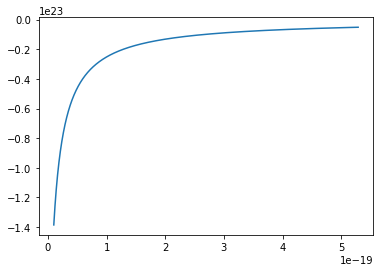

In [7]:
r = np.linspace(1e-20,a0*1e-18,10000000) # This is in Armstrong!!!
plt.plot(r, deltaU_polar(r, Z = Z))

In [8]:
L = 4*a0 + d
func = lambda x,y,z:s_orbit(x, y, z)* deltaU(x - d, y, z)* s_orbit(x - d, y, z)
sssigmaintegral = tplquad(func, -L, L, -L, L, -L, L)
sssigma = sssigmaintegral[0]/16
print("sssigma = ", sssigma ,"[eV]")

L = 4*a0 + d
func = lambda x,y,z:s_orbit(x, y, z)* deltaU(x - d, y, z)* px_orbit(x - d, y, z)
spsigmaintegral = tplquad(func, -L, L, -L, L, -L, L)
spsigma = spsigmaintegral[0]/16
print("spsigma = ", spsigma ,"[eV]")

L = 4*a0 + d
func = lambda x,y,z:px_orbit(x, y, z)* deltaU(x - d, y, z)* px_orbit(x - d, y, z)
ppsigmaintegral = tplquad(func, -L, L, -L, L, -L, L)
ppsigma = ppsigmaintegral[0]/16
print("ppsigma = ", ppsigma ,"[eV]")

L = 4*a0 + d
func = lambda x,y,z:pz_orbit(x, y, z)* deltaU(x - d, y, z)* pz_orbit(x - d, y, z)
pppiintegral = tplquad(func, -L, L, -L, L, -L, L)
pppi = pppiintegral[0]/16
print("pppi = ", pppi ,"[eV]")

sssigma =  -0.12173823924023817 [eV]
spsigma =  0.1280331114758608 [eV]
ppsigma =  0.1353830047468881 [eV]
pppi =  -0.010183798473539786 [eV]


In [9]:
eps0s = 0
eps0p = 0

In [12]:
N = 100
x_values1 = np.linspace(0, 2*np.pi/(3*a), N)
y_values1 = np.sqrt(3)*x_values1
x_values1plot = x_values1

x_values2 = np.linspace(2*np.pi/(3*a), np.pi/(a), int(N/2))
x_values2plota = np.linspace(0, np.pi/(3*a), int(N/2)) + 2*np.pi/(3*a)*np.ones(int(N/2))
x_values2plot = x_values2plota[1::]
y_values2 = -np.sqrt(3)*x_values2 + 4*np.pi/(np.sqrt(3)*a)

'''x3 = np.linspace(0, 2*np.pi/(3*a), N)
x_values3 = x3[::-1]
x_values3plota = np.linspace(0, 2*np.pi/(3*a), N) + 6*np.pi/(3*a)*np.ones(N)
x_values3plot = x_values3plota[1::]

y_values3 = np.sqrt(3)*x_values3
'''
x_valuesplot = np.concatenate([x_values1plot, x_values2plot])

band = []
for i,j in zip(x_values1,y_values1):
    eigen = np.linalg.eigh(matrix(i,j,eps0s,eps0p,sssigma,spsigma,ppsigma,pppi))
    eigen = eigen[0]
    band.append(eigen)


for i,j in zip(x_values2[1::],y_values2[1::]):
    eigen = np.linalg.eigh(matrix(i,j,eps0s,eps0p,sssigma,spsigma,ppsigma,pppi))
    eigen = eigen[0]
    band.append(eigen)
'''    
for i,j in zip(x_values3[1::],y_values3[1::]):
    eigen = np.linalg.eigh(matrix(i,j,eps0s,eps0p,sssigma,spsigma,ppsigma,pppi))
    eigen = eigen[0]
    band.append(eigen)
'''

# Transpose to plot
bandT = np.transpose(band)

<ipython-input-3-69f56d8d6464>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  I[0][1] = -sssigma*(1 + np.exp(1j*(k1a1(x,y))) + np.exp(1j*(k2a2(x,y))))
<ipython-input-3-69f56d8d6464>:21: ComplexWarning: Casting complex values to real discards the imaginary part
  I[0][5] = -np.sqrt(3)/2*spsigma*(np.exp(1j*(k1a1(x,y))) + np.exp(1j*(k2a2(x,y))))
<ipython-input-3-69f56d8d6464>:23: ComplexWarning: Casting complex values to real discards the imaginary part
  I[0][7] = spsigma - 1/2*spsigma*(np.exp(1j*(k1a1(x,y))) + np.exp(1j*(k2a2(x,y))))
<ipython-input-3-69f56d8d6464>:25: ComplexWarning: Casting complex values to real discards the imaginary part
  I[1][0] = -sssigma*(1 + np.exp(-1j*(k1a1(x,y))) + np.exp(-1j*(k2a2(x,y))))
<ipython-input-3-69f56d8d6464>:29: ComplexWarning: Casting complex values to real discards the imaginary part
  I[1][4] = np.sqrt(3)/2*spsigma*(np.exp(-1j*(k1a1(x,y))) + np.exp(-1j*(k2a2(x,y))))
<ipython-input-3-69f56d8d6464>:31: ComplexWar

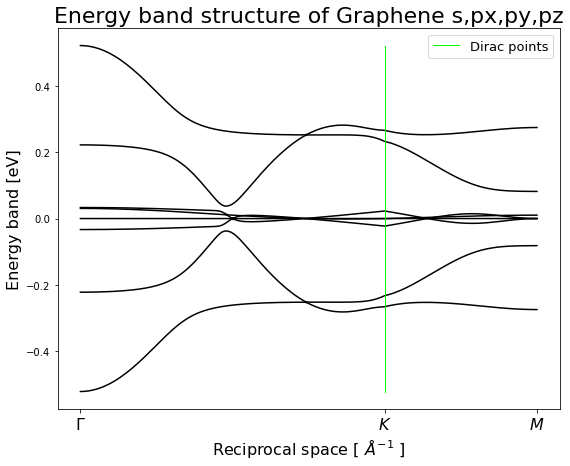

In [14]:
fig = plt.figure(figsize = (9,7))
ax = fig.gca()

'''
indexes = [6,7]

for i in indexes:
    ax.plot(x_valuesplot, bandT[i]*1/1.6*1e19, color = "black") # Converting into eV but not sure if it's right)
    
ax.plot([4*np.pi/(3*a), 4*np.pi/(3*a)], [-bandT[6][0]*1/1.6*1e19, bandT[6][0]*1/1.6*1e19], color = "lime", label = "Dirac points", linewidth = 1)
ax.plot([6*np.pi/(3*a), 6*np.pi/(3*a)], [-bandT[6][0]*1/1.6*1e19, bandT[6][0]*1/1.6*1e19], color = "lime", linewidth = 1)

'''
for i in range(8):
     ax.plot(x_valuesplot, bandT[i], color = "black") # Converting into eV but not sure if it's right)

ax.plot([2*np.pi/(3*a), 2*np.pi/(3*a)], [-bandT[0][0], bandT[0][0]], color = "lime", label = "Dirac points", linewidth = 1)
ax.set_title("Energy band structure of Graphene s,px,py,pz", fontsize = 22)
ax.set_xlabel("Reciprocal space [ $ Å^{-1} $ ]", fontsize = 16)
ax.set_ylabel("Energy band [eV]", fontsize = 16)

ticks = ["$ \Gamma $", "$ K $", "$ M $"]
ax.set_xticks([0, 2*np.pi/(3*a), np.pi/a])
ax.set_xticklabels(ticks,fontsize = 16)
#ax.set_yticks([0])
#ax.set_yticklabels(["$0$"],fontsize = 16)
ax.legend(fontsize = 13)



from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages('Energy bands of Graphene s,px,py,pz, trial.pdf')
pdf.savefig()
pdf.close()


# 勝手に分裂させちゃダメかも？？